<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_B_17_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module B: 17.1, 17.2, 17.3

## 17.1: Interpolation

This section briefly introduces the topic of interpolation and how it's different to other estimation techniques such as linear regression. I have writen a program that demonstrates this concept.

First, a brief explanation of interpolation:

Given a dataset of independent values $x_i$ and dependent values $y_i$, where $i = 1, ... ,n$, the **interpolation function** $\hat{y}(x)$ defines an estimation where $\hat{y}(x_i) = y_i$, or every datapoint is included in the estimation.
<bv>

Since every actual datapoint is included in the interpolation function, an underlying model of estimation is not required. This allows for better estimations in some cases than linear regression, where predictive points need to be fine tuned around each individual actual data point, instead of the sum average.  

The following segments of code demonstrate this concept.
<bv>

First, it creates a dataset of 25 random variables at $x = 1, 2, ... , 25$. Then it computes a linear regression fit and a very simple interpolation function, as more complex techniques will be covered in the following sections, for the data. Then it plots both functions and creates a table showing the differences in approximation results of both functions.

Imports needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Create the dataset and the linear regression and interpolation models

In [2]:
# Step 1: Generate a random dataset of 25 points
x = np.arange(1, 26)  # x values from 1 to 25
y = np.random.randn(25) * 10 + 50  # Random y values with some noise

# Step 2: Linear Regression Function
# Reshape x for Linear Regression
x_reshape = x.reshape(-1, 1)
linear_reg = LinearRegression()
linear_reg.fit(x_reshape, y)
y_linear = linear_reg.predict(x_reshape)

# Step 3: Simple Interpolation Function (piecewise linear)
y_interp = np.zeros_like(y)
for i in range(len(x) - 1):
    # Create a straight line between consecutive points
    y_interp[i] = y[i]
    if i < len(x) - 1:
        y_interp[i + 1] = y[i + 1]

Plot of the models compared

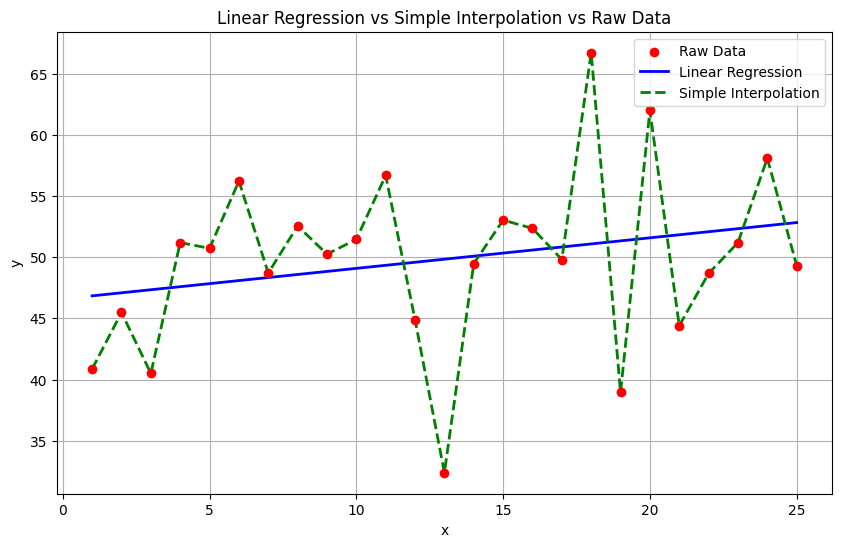

In [3]:
# Step 4: Plot the data, linear regression, and interpolation
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Raw Data', zorder=5)
plt.plot(x, y_linear, label='Linear Regression', color='blue', lw=2)
plt.plot(x, y_interp, label='Simple Interpolation', color='green', linestyle='--', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression vs Simple Interpolation vs Raw Data')
plt.legend()
plt.grid(True)
plt.show()

Tables referncing the differences in approximation of both models

In [4]:
# Step 5: Create tables
# Linear Regression y-values table
linear_table = pd.DataFrame({
    'x': x,
    'y_linear': y_linear
})

# Simple Interpolation y-values table
interp_table = pd.DataFrame({
    'x': x,
    'y_interp': y_interp
})

# Display tables
print("Linear Regression y-values Table:")
print(linear_table)

print("\nSimple Interpolation y-values Table:")
print(interp_table)

Linear Regression y-values Table:
     x   y_linear
0    1  46.838751
1    2  47.088260
2    3  47.337769
3    4  47.587279
4    5  47.836788
5    6  48.086297
6    7  48.335806
7    8  48.585315
8    9  48.834825
9   10  49.084334
10  11  49.333843
11  12  49.583352
12  13  49.832861
13  14  50.082371
14  15  50.331880
15  16  50.581389
16  17  50.830898
17  18  51.080407
18  19  51.329917
19  20  51.579426
20  21  51.828935
21  22  52.078444
22  23  52.327953
23  24  52.577463
24  25  52.826972

Simple Interpolation y-values Table:
     x   y_interp
0    1  40.860112
1    2  45.481382
2    3  40.506317
3    4  51.189439
4    5  50.723680
5    6  56.217719
6    7  48.705126
7    8  52.544257
8    9  50.246239
9   10  51.453558
10  11  56.677643
11  12  44.886511
12  13  32.388501
13  14  49.472505
14  15  53.026023
15  16  52.351299
16  17  49.805255
17  18  66.703097
18  19  38.948216
19  20  61.993273
20  21  44.398762
21  22  48.667262
22  23  51.188275
23  24  58.080841
24  25  49

As you can see, the simple interpolation function retains the original data points and is far better for predicting more variant datasets or datasets where predictions need to be fine tuned for each individual data point. More complex interpolation techniques will be used in later sections, which will improve the predicting accuracy of the simple interpolation function used in this section

## 17.2: Linear Interpolation

In this section I will cover the concept of **Linear Interpolation** and show code demonstrating the concept

**Linear Interpolation** is defined as a the estimated point between two nearest points modeled by a line joining between those points.
<bv>

For 𝑥
 -data points are in ascending order; that is, $𝑥_𝑖<𝑥_{𝑖+1}$
, where $𝑥$
 is a point such that $𝑥_𝑖<𝑥<𝑥_{𝑖+1}$, the linear interpolation at $x$ is
 <bv>

 $$
\hat{y}(x_i) = y_i + \frac{(y_{i+1} - y_i)(x - x_i)}
                            {(x_{i+1} - x_i)}
 $$


The following segments of code continues use of the dataset from the last section. It creates a linear interpolation model for the data, plots it, shows a table of 10 randomly selected $\hat{y}$ values to demonstrate its approximation abililities, and finally lets the user find a linear interpolation estimate at a specific $x$ value (from 1 to 25) of their choice. Give it a try!

Import 'interp1d'

In [5]:
from scipy.interpolate import interp1d

The linear interpolation function and its plot:

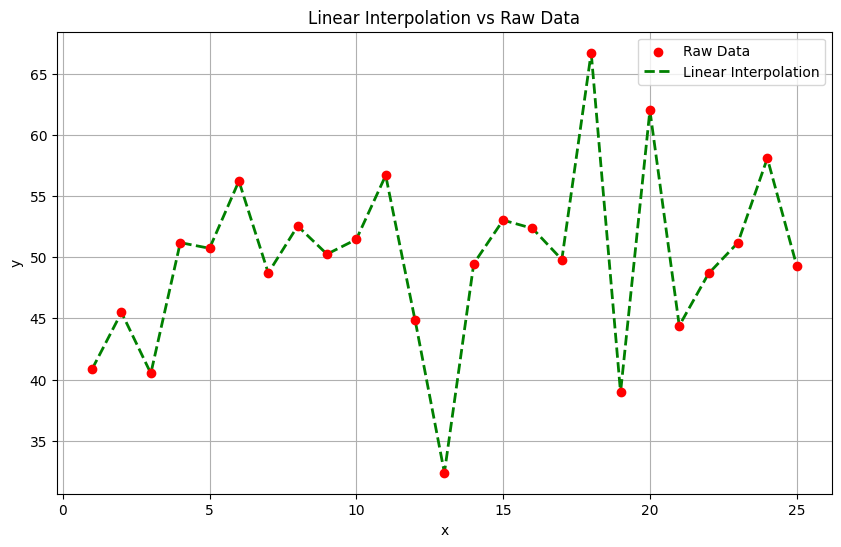

In [6]:
# Step 1: Generate a random dataset of 25 points (already done in last section)

# Step 2: Create a linear interpolation function using scipy
interp_func = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Step 3: Plot the raw data and the linear interpolation
x_fine = np.linspace(1, 25, 1000)  # Fine x values for smooth interpolation plot
y_interpolated = interp_func(x_fine)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Raw Data', zorder=5)
plt.plot(x_fine, y_interpolated, label='Linear Interpolation', color='green', linestyle='--', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation vs Raw Data')
plt.legend()
plt.grid(True)
plt.show()

Table for 10 randomly selected linear interpolation points

In [7]:
# Step 4: Create tables for random x values and their corresponding interpolation y values
random_x_values = np.random.choice(x, 10, replace=False)  # Random 10 x values from 1 to 25
random_y_interp = interp_func(random_x_values)

# Create table for the random x values and their corresponding interpolation y values
random_table = pd.DataFrame({
    'Random x': random_x_values,
    'y_interp': random_y_interp
})

# Display the table
print("Random x values and corresponding y_interp values:")
print(random_table)

Random x values and corresponding y_interp values:
   Random x   y_interp
0         3  40.506317
1        17  49.805255
2        13  32.388501
3        16  52.351299
4        12  44.886511
5        25  49.306246
6        18  66.703097
7        20  61.993273
8        24  58.080841
9         1  40.860112


Find a linear interpolation estimate yourself! Just enter an x value from 1 to 25

In [8]:
# Step 5: User input to get the interpolation value for a given x
user_x = int(input("\nEnter a value of x (1-25) to get the corresponding y value from the interpolation function: "))
if 1 <= user_x <= 25:
    user_y_interp = interp_func(user_x)  # Get the interpolation value at the user's input
    print(f"The y value from the interpolation function at x = {user_x} is: {user_y_interp}")
else:
    print("Invalid input! Please enter a value between 1 and 25.")


Enter a value of x (1-25) to get the corresponding y value from the interpolation function: 4
The y value from the interpolation function at x = 4 is: 51.18943906611392


## 17.3: Cubic Spline Interpolation

In this section, I will work off of the dataset in the previous sections. First, we used a very primitive interpolation function, then a slightly more precise linear interpolation function. In this section, I bring it all together and use a **cubic spline interpolation** on the dataset

First, an overview of the topic:

**Cubic Spline Interpolation** is defined as a series of $4(n-1)$ cubic polynomial functions, where $n$ is the number of data points, between points $(𝑥_𝑖,𝑦_𝑖)$ and $(𝑥_{𝑖+1},𝑦_{𝑖+1})$, where each cubic polynomial function is defined as

$$
𝑆_𝑖(𝑥)=𝑎_𝑖𝑥^3+𝑏_𝑖𝑥^2+𝑐_𝑖𝑥+𝑑_𝑖
$$

To find coefficients $a_i$, $b_i$, $c_i$, and $d_i$, we join several constraints the cubic spline must follow into a linear matrix. From there, it is possible to algebraically deduce the unknown coefficients.


The following code plots the cubic spline interpolation of the dataset from the previous sections, finds the unknown coefficients, and allows the user to find the cubic spline interpolation estimate at a certain x value.

Import 'Cubic Spline'

In [9]:
from scipy.interpolate import CubicSpline

The following code shows a cubic spline interpolation plot of the previous dataset. Notice the smoother transitions between points than the linear interpolation plot from the previous section.

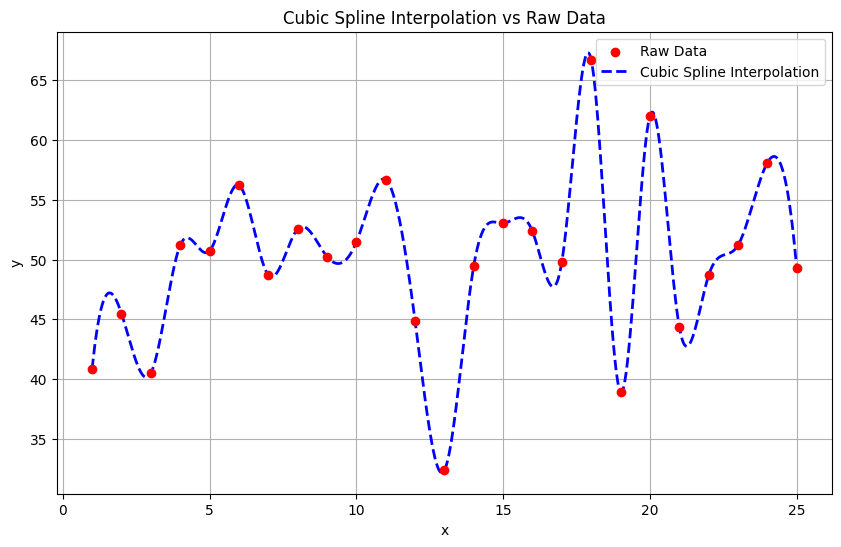

In [10]:
# Step 1: Generate a random dataset of 25 points (done in previous sections)

# Step 2: Create a cubic spline interpolation function using scipy
cubic_spline = CubicSpline(x, y)

# Step 3: Plot the raw data and the cubic spline interpolation
x_fine = np.linspace(1, 25, 1000)  # Fine x values for smooth interpolation plot
y_spline = cubic_spline(x_fine)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Raw Data', zorder=5)
plt.plot(x_fine, y_spline, label='Cubic Spline Interpolation', color='blue', linestyle='--', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation vs Raw Data')
plt.legend()
plt.grid(True)
plt.show()

Find the unknown coefficients $a_i$, $b_i$, $c_i$, and $d_i$

In [25]:
# Step 4: Extract the coefficients (a, b, c, d) of the cubic spline
# For each segment, cubic spline is of the form:
# S(x) = a(x - x_i)^3 + b(x - x_i)^2 + c(x - x_i) + d for each segment [x_i, x_(i+1)]

# The coefficients are stored in cubic_spline.c
# cubic_spline.c contains the second derivatives (c values), and we can compute the others.
a_coeffs = cubic_spline.c[:-1]  # c coefficients, for the segments
b_coeffs = np.diff(y) / np.diff(x) - (2*cubic_spline.c[:-1] + cubic_spline.c[1:]) * (x[1:] - x[:-1]) / 3
c_coeffs = cubic_spline.c[:-1]  # c values are directly available
d_coeffs = y[:-1]

# Display the coefficients (a, b, c, d) for each segment
print("Cubic Spline Coefficients:")
for i in range(len(x) - 1):
    print(f"Segment {i}:")
    # Accessing the element of the array to apply the formatting
    print(f"  a = {a_coeffs[0][i]:.4f}, b = {b_coeffs[0][i]:.4f}, c = {c_coeffs[0][i]:.4f}, d = {d_coeffs[i]:.4f}")

Cubic Spline Coefficients:
Segment 0:
  a = 7.2238, b = 8.6286, c = 7.2238, d = 40.8601
Segment 1:
  a = 7.2238, b = -8.1915, c = 7.2238, d = 45.4814
Segment 2:
  a = -10.8644, b = 12.3017, c = -10.8644, d = 40.5063
Segment 3:
  a = 9.4268, b = -1.5103, c = 9.4268, d = 51.1894
Segment 4:
  a = -9.7340, b = 7.7966, c = -9.7340, d = 50.7237
Segment 5:
  a = 10.5427, b = -8.9938, c = 10.5427, d = 56.2177
Segment 6:
  a = -8.0784, b = 4.2292, c = -8.0784, d = 48.7051
Segment 7:
  a = 4.2819, b = -2.0697, c = 4.2819, d = 52.5443
Segment 8:
  a = 0.5933, b = -0.3872, c = 0.5933, d = 50.2462
Segment 9:
  a = -6.1438, b = 7.5276, c = -6.1438, d = 51.4536
Segment 10:
  a = 2.9497, b = -9.4062, c = 2.9497, d = 56.6776
Segment 11:
  a = 10.6532, b = -18.1984, c = 10.6532, d = 44.8865
Segment 12:
  a = -15.2737, b = 18.0150, c = -15.2737, d = 32.3885
Segment 13:
  a = 7.3289, b = 4.6898, c = 7.3289, d = 49.4725
Segment 14:
  a = -4.7398, b = 1.1784, c = -4.7398, d = 53.0260
Segment 15:
  a = 13.98

Find a cubic spline interpolation estimate by entering the x value of the desired estimate!

In [21]:
# Step 5: User input to get the interpolation value for a given x
user_x = float(input("\nEnter a value of x (1-25) to get the corresponding y value from the cubic spline interpolation: "))
if 1 <= user_x <= 25:
    user_y_spline = cubic_spline(user_x)  # Get the interpolation value at the user's input
    print(f"The y value from the cubic spline interpolation at x = {user_x} is: {user_y_spline}")
else:
    print("Invalid input! Please enter a value between 1 and 25.")


Enter a value of x (1-25) to get the corresponding y value from the cubic spline interpolation: 4
The y value from the cubic spline interpolation at x = 4.0 is: 51.18943906611392


From the code, it is clear that the cubic spline interpolation model, though more complex, is more of an accurate estimation model than linear interpolation and by far more accurate than linear regression.